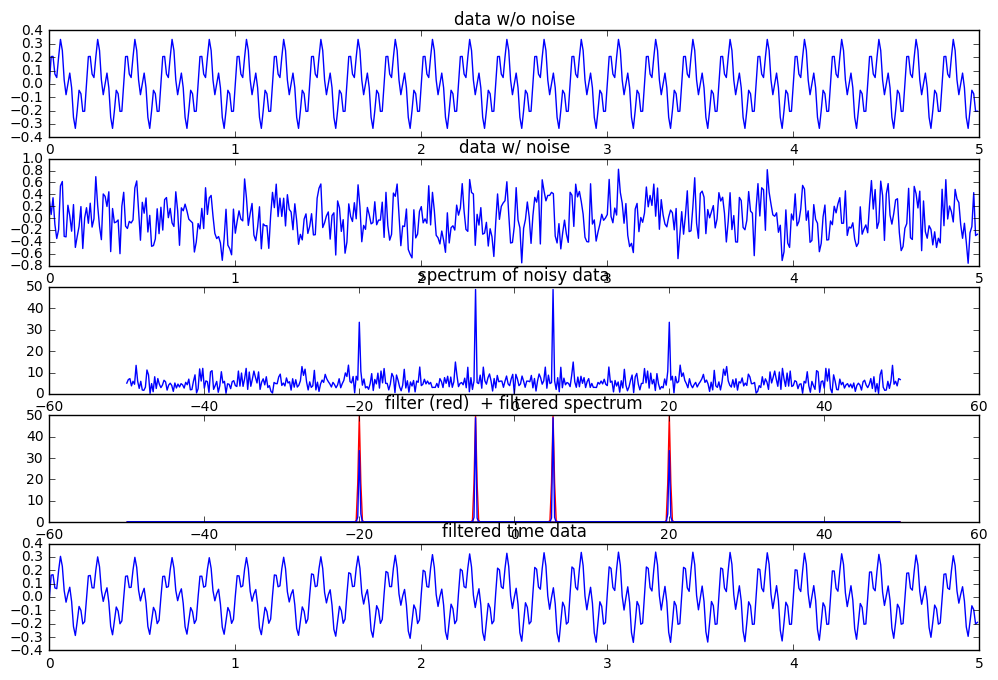

In [4]:
# fourier filter example (1D)
%matplotlib inline
import matplotlib.pyplot as p
import numpy as np

# make up a noisy signal
dt=0.01
t= np.arange(0,5,dt)
f1,f2= 5, 20  #Hz
n=t.size
s0=  0.2*np.sin(2*np.pi*f1*t)+ 0.15 * np.sin(2*np.pi*f2*t)
sr= np.random.rand(np.size(t)) 
s=s0+sr

#fft
s-= s.mean()  # remove DC (spectrum easier to look at)
fr=np.fft.fftfreq(n,dt)   # a nice helper function to get the frequencies right
fou=np.fft.fft(s) 

#make up a narrow bandpass with a Gaussian
df=0.1
gpl= np.exp(- ((fr-f1)/(2*df))**2)+ np.exp(- ((fr-f2)/(2*df))**2)  # pos. frequencies
gmn= np.exp(- ((fr+f1)/(2*df))**2)+ np.exp(- ((fr+f2)/(2*df))**2)  # neg. frequencies
g=gpl+gmn    
filt=fou*g  #filtered spectrum = spectrum * bandpass 

#ifft
s2=np.fft.ifft(filt)

p.figure(figsize=(12,8))

p.subplot(511)
p.plot(t,s0)
p.title('data w/o noise')

p.subplot(512)
p.plot(t,s)
p.title('data w/ noise')

p.subplot(513)
p.plot(np.fft.fftshift(fr) ,np.fft.fftshift(np.abs(fou) )  )
p.title('spectrum of noisy data')

p.subplot(514)
p.plot(fr,g*50, 'r')  
p.plot(fr,np.abs(filt))
p.title('filter (red)  + filtered spectrum')

p.subplot(515)
p.plot(t,np.real(s2))
p.title('filtered time data')